# Data Analysis of Coronavirus Cases


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [29]:
def melt_and_merge(agg=True):

    df_one = pd.read_csv('time_series_covid_19_recovered.csv')
    df_one=pd.melt(df_one,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name=['Date'],value_name='Recovered')
    df_one.rename({'Province/State':"State","Country/Region":'Country'},axis=1,inplace=True)
    df_one['Date']=pd.to_datetime(df_one['Date'])

    df_two=pd.read_csv("time_series_covid_19_deaths.csv")
    df_two=pd.melt(df_two,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name=['Date'],value_name='Deaths')
    df_two.rename({'Province/State':"State","Country/Region":'Country'},axis=1,inplace=True)
    df_two['Date']=pd.to_datetime(df_two['Date'])

    df_three=pd.read_csv("time_series_covid_19_confirmed.csv")
    df_three=pd.melt(df_three,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name=['Date'],value_name='Confirmed')
    df_three.rename({'Province/State':"State","Country/Region":'Country'},axis=1,inplace=True)
    df_three['Date']=pd.to_datetime(df_three['Date'])
    
    if (agg):
        col={"Lat":np.max,"Long":np.max,"Recovered":sum}
        df_one=df_one.groupby(['Country',"Date"],as_index=False).agg(col)
        
        col={"Lat":np.max,"Long":np.max,"Deaths":sum}
        df_two=df_two.groupby(['Country',"Date"],as_index=False).agg(col)
        
        col={"Lat":np.max,"Long":np.max,"Confirmed":sum}
        df_three=df_three.groupby(['Country',"Date"],as_index=False).agg(col)

    else:
        df_one['State'].fillna(df_one['Country'],inplace=True)
        df_two['State'].fillna(df_two['Country'],inplace=True)
        df_three['State'].fillna(df_three['Country'],inplace=True)
    
    
    #print("The shape of three datasets are equal :",(df_three.shape[0]==df_one.shape[0]==df_two.shape[0]))
    
    merge=pd.merge(df_one,df_two)
    merge=pd.merge(merge,df_three)
    
    return merge

In [30]:
data=melt_and_merge(True)

In [31]:
data.head(10)

,Country,Date,Lat,Long,Recovered,Deaths,Confirmed
0,Afghanistan,2020-01-22,33.0,65.0,0,0,0
1,Afghanistan,2020-01-23,33.0,65.0,0,0,0
2,Afghanistan,2020-01-24,33.0,65.0,0,0,0
3,Afghanistan,2020-01-25,33.0,65.0,0,0,0
4,Afghanistan,2020-01-26,33.0,65.0,0,0,0
5,Afghanistan,2020-01-27,33.0,65.0,0,0,0
6,Afghanistan,2020-01-28,33.0,65.0,0,0,0
7,Afghanistan,2020-01-29,33.0,65.0,0,0,0
8,Afghanistan,2020-01-30,33.0,65.0,0,0,0
9,Afghanistan,2020-01-31,33.0,65.0,0,0,0


In [32]:
df_four=pd.read_csv("COVID19_open_line_list.csv",usecols=['age','sex','province','country','wuhan(0)_not_wuhan(1)',"latitude",'longitude'])
df_four.head(2)

,age,sex,province,country,wuhan(0)_not_wuhan(1),latitude,longitude
0,30,male,Anhui,China,1.0,31.64696,117.7166
1,47,male,Anhui,China,1.0,31.77863,117.3319


In [33]:
df_four.sex.fillna('Unknown',inplace=True)
df_four.sex=df_four['sex'].map({"Female":"female","Male":"male","male":"male",'female':'female',"Unknown":"Unknown"})

In [34]:
x=data.groupby(['Country'],as_index=False)['Deaths'].last().sort_values(by="Deaths",ascending=False)
fig=px.pie(x,"Country","Deaths")
fig.update_layout(title="Global Covid-19 Deaths")

# Global Covid-19 Deaths

In [35]:
temp_flg = x[x['Deaths']>0][['Country', 'Deaths']]
temp_flg.sort_values('Deaths', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')


,Country,Deaths
0,China,3193
1,Italy,1441
2,Iran,611
3,Spain,195
4,France,91
5,"Korea, South",72
6,US,54
7,Japan,22
8,United Kingdom,21
9,Switzerland,13


# Global Covid-19 -Countries with Recovery

In [37]:
rec=data.groupby(['Country'],as_index=False)['Recovered','Confirmed'].last().sort_values(by="Confirmed",ascending=False)
temp_flg = rec[rec['Recovered']>0][['Country', 'Recovered']]
temp_flg.sort_values('Recovered', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Recovered
0,China,65660
1,Iran,2959
2,Italy,1966
3,Spain,517
4,"Korea, South",510
5,Cruise Ship,325
6,Japan,118
7,Singapore,105
8,Germany,46
9,Bahrain,44


# Global Covid-19 -Countries with no recovery

In [38]:
norec=data.groupby(['Country'],as_index=False)['Recovered','Confirmed'].last().sort_values(by="Confirmed",ascending=False)
temp_flg = norec[norec['Recovered']==0][['Country', 'Recovered','Confirmed']]
temp_flg1 = temp_flg[temp_flg['Confirmed']>0][['Country', 'Recovered','Confirmed']]
temp_flg1.sort_values('Confirmed', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Recovered,Confirmed
0,Czechia,0,189
1,Slovenia,0,181
2,Brazil,0,151
3,Ireland,0,129
4,Estonia,0,115
5,Poland,0,103
6,Chile,0,61
7,Luxembourg,0,51
8,Serbia,0,46
9,Slovakia,0,44


In [40]:

sex= df_four.sex.value_counts()[1:]
fig=px.pie(sex,sex.index,sex)
fig.update_layout(title="Male vs Female infected Globally")

# 1.Death By Country

In [41]:
most_effected=data.groupby(['Country'],as_index=False)['Deaths'].last().sort_values(by="Deaths",ascending=False)[:10]
fig=px.bar(most_effected,x="Country",y="Deaths",title="Most affected countries by Number of Deaths")
fig.show()

In [128]:
most_effected=data.groupby(['Country'],as_index=False)['Confirmed'].last().sort_values(by="Confirmed",ascending=False)[1:11]
fig=px.bar(most_effected,x="Country",y="Confirmed",title="Most affected countries by Number of Confirmed Cases[Excluding China]")
fig.show()

In [129]:
most_affected=data.groupby(['Country'],as_index=False)['Recovered'].last().sort_values(by="Recovered",ascending=False)[1:11]
fig=px.bar(most_affected,x="Country",y="Recovered",title="Most affected countries by Number of Recovered Cases[Excluding China]")
fig.show()

In [44]:
fig = go.Figure()
for country in ["China","Italy","Iran","Spain"]:
   

    fig.add_trace(go.Scatter(
        x=data[data['Country']==country]['Date'],
        y=data[data['Country']==country]['Confirmed'],
        name = country,
        connectgaps=True 
    ))
fig.update_layout(title="Timeseries plot of number of Confirmed Cases")    
fig.show()

In [45]:
fig = go.Figure()
for country in ['China',"Italy","Iran","Spain"]:
    lag_1=data[data['Country']==country]['Confirmed'].shift(1)
    change=(data[data['Country']==country]['Confirmed']-lag_1).fillna(0)
    fig.add_trace(go.Scatter(
        x=data[data['Country']==country]['Date'],
        y=change,
        connectgaps=True # override default to connect the gaps
    ))
fig.update_layout(title="Timeseries plot of number of Confirmed cases each day")    
fig.show()

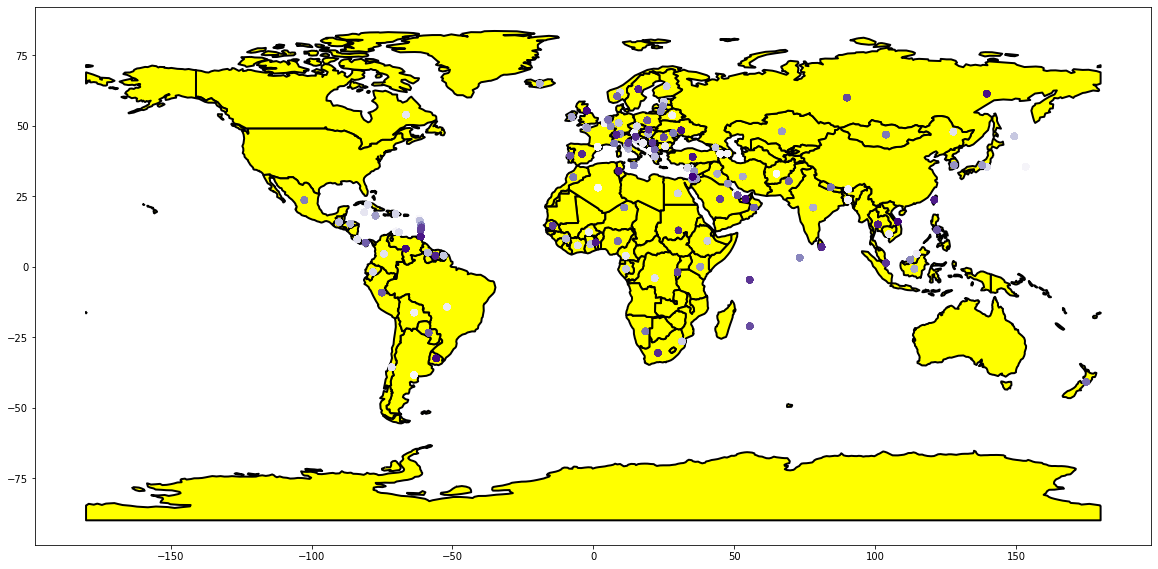

In [46]:
gdf01 = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['Long'],data['Lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig,ax = plt.subplots(figsize=(20,10))
world.geometry.plot(color='Yellow',edgecolor='k',linewidth=2,ax=ax)
gdf01.plot(cmap='Purples',ax=ax)


In [47]:
data['cases_date'] = pd.to_datetime(data['Date'])

In [48]:
ts = data.set_index('cases_date')

In [49]:
df_by_date = ts.groupby(['cases_date']).sum().reset_index(drop=None)

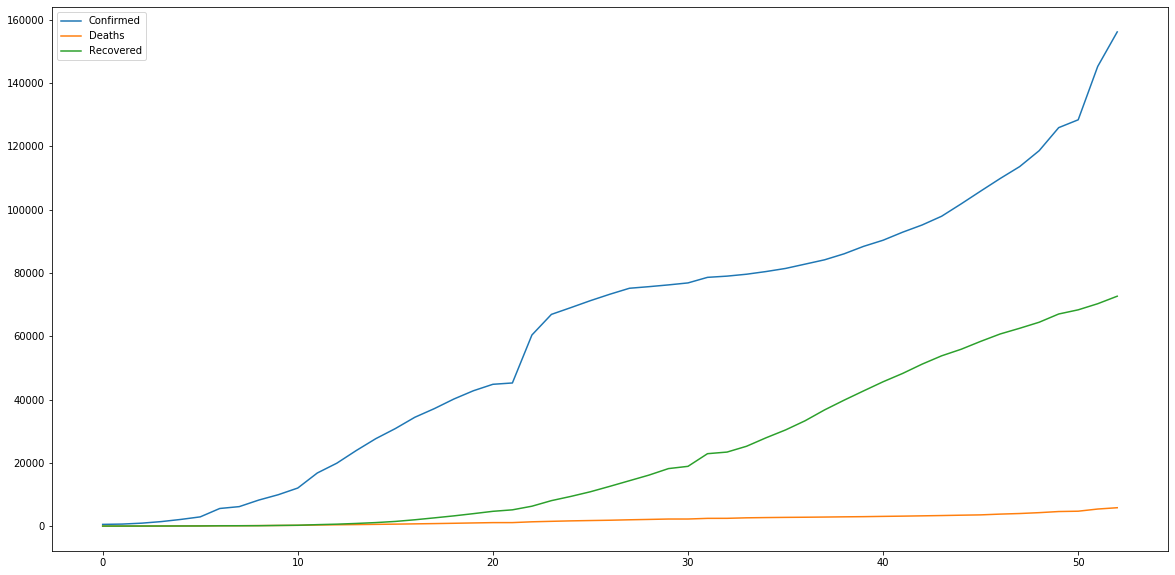

In [50]:
df_by_date[['Confirmed', 'Deaths', 'Recovered']].plot(kind='line',figsize=(20,10))

In [51]:
locations=pd.read_csv("plotly_countries_and_codes.csv",usecols=['COUNTRY','CODE'])
df=pd.merge(data,locations,left_on=['Country'],right_on=['COUNTRY'],how="left")

In [52]:
df_country=df.groupby(['Country',"CODE"],as_index=False)[['Recovered',"Deaths","Confirmed"]].last()
fig = px.choropleth(df_country, locations="CODE",color="Deaths", # lifeExp is a column of gapminder
hover_name="Country", # column to add to hover information
color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title="Global COVID-19 Deaths")
fig.show()

In [53]:
fig = px.choropleth(df_country, locations="CODE",color="Confirmed", # lifeExp is a column of gapminder
hover_name="Country", # column to add to hover information
color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title="Global COVID-19 Confirmed Cases")
fig.show()

In [55]:
fig = px.choropleth(df_country, locations="CODE",
color="Recovered", # lifeExp is a column of gapminder
hover_name="Country", # column to add to hover information
color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title="Global COVID-19 Recovered Cases")
fig.show()

In [143]:
df=melt_and_merge(False)
Hubei=df[df['State']=="Hubei"]
Hubei.loc[:,'lag_1']=Hubei['Confirmed'].shift(1)
Hubei.loc[:,'Daily']=(Hubei['Confirmed']-Hubei['lag_1']).fillna(0).values
fig=px.bar(Hubei,x="Date",y="Daily")
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.update_layout(title="Daily Confirmed Cases in Hubei province")
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df=melt_and_merge(False)
china=df[df['Country']=="China"]
fig = go.Figure()
states=china.State.unique().tolist()
states.remove('Hubei')
for country in states:
    fig.add_trace(go.Scatter(
        x=china[china['State']==country]['Date'],
        y=china[china['State']==country]['Confirmed'],
        name = country, 
        connectgaps=True
    ))
fig.update_layout(title="Timeseries plot of number of Confirmed Cases in Provinces except Hubei")  
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [62]:
restof_world=data[data['Country']!="China"].groupby(['Date'],as_index=False)[['Confirmed',"Recovered","Deaths"]].agg(sum)
china=data[data['Country']=="China"]

In [63]:
fig = go.Figure()
fig.add_trace(go.Bar(x=china['Date'],
                y=china['Confirmed'],
                name='China',
                marker_color='rgb(255, 0, 0)'
                ))
fig.add_trace(go.Bar(x=restof_world['Date'],
                y=restof_world['Confirmed'],
                name='Rest of world',
                marker_color='rgb(0, 0, 255)'
                ))

fig.update_layout(
    title='Global Confirmed Cases, China and Rest of World',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Confirmed Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [64]:
fig = go.Figure()
fig.add_trace(go.Bar(x=china['Date'],
                y=china['Deaths'],
                name='China',
                marker_color='rgb(255, 0, 0)'
                ))
fig.add_trace(go.Bar(x=restof_world['Date'],
                y=restof_world['Deaths'],
                name='Rest of world',
                marker_color='rgb(0, 0, 255)'
                ))

fig.update_layout(
    title='Global Deaths China and Rest of World',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Death Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(250, 242, 242,0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1
)
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [65]:
fig = go.Figure()
fig.add_trace(go.Bar(x=china['Date'],
                y=china['Recovered'],
                name='China',
                marker_color='rgb(255, 0, 0)'
                ))
fig.add_trace(go.Bar(x=restof_world['Date'],
                y=restof_world['Recovered'],
                name='Rest of world',
                marker_color='rgb(0, 0, 255)'
                ))

fig.update_layout(
    title='Global Recovered Cases, China and Rest of World',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Recovered Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [66]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Italy","Korea, South","Spain", "India",))

countries=["Italy","Korea, South","Spain", "India",]

    
country=data[data['Country']==countries[0]]
fig.add_trace(go.Scatter(x=country['Date'], y=country['Confirmed'],
                    marker=dict(color=country['Confirmed'], coloraxis="coloraxis")),
              1, 1)
    
country=data[data['Country']==countries[1]]
fig.add_trace(go.Scatter(x=country['Date'], y=country['Confirmed'],
                    marker=dict(color=country['Confirmed'], coloraxis="coloraxis")),
              1,2 )
    
country=data[data['Country']==countries[2]]
fig.add_trace(go.Scatter(x=country['Date'], y=country['Confirmed'],
                    marker=dict(color=country['Confirmed'], coloraxis="coloraxis")),
              2, 1)
    
country=data[data['Country']==countries[3]]
fig.add_trace(go.Scatter(x=country['Date'], y=country['Confirmed'],
                    marker=dict(color=country['Confirmed'], coloraxis="coloraxis")),
              2,2 )
fig.update_layout(title="Confirmed cases in Italy,S.Korea,Spain and India")
fig.show()   


In [67]:
recoveries_df= pd.read_csv('time_series_covid_19_recovered.csv')
deaths_df=pd.read_csv("time_series_covid_19_deaths.csv")
confirmed_df=pd.read_csv("time_series_covid_19_confirmed.csv")
cols=confirmed_df.keys()


In [68]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [69]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [70]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [71]:
days_in_future = 5
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-5]

In [72]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [73]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False) 

In [74]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 8753.452020202018
MSE: 169179593.56311837


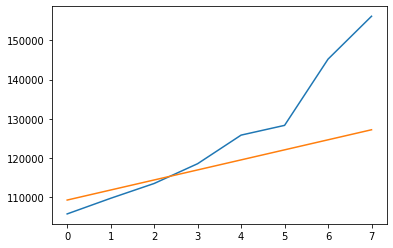

In [75]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

In [76]:
linear_pred

array([[ -5605.11111111],
       [ -3050.64141414],
       [  -496.17171717],
       [  2058.2979798 ],
       [  4612.76767677],
       [  7167.23737374],
       [  9721.70707071],
       [ 12276.17676768],
       [ 14830.64646465],
       [ 17385.11616162],
       [ 19939.58585859],
       [ 22494.05555556],
       [ 25048.52525253],
       [ 27602.99494949],
       [ 30157.46464646],
       [ 32711.93434343],
       [ 35266.4040404 ],
       [ 37820.87373737],
       [ 40375.34343434],
       [ 42929.81313131],
       [ 45484.28282828],
       [ 48038.75252525],
       [ 50593.22222222],
       [ 53147.69191919],
       [ 55702.16161616],
       [ 58256.63131313],
       [ 60811.1010101 ],
       [ 63365.57070707],
       [ 65920.04040404],
       [ 68474.51010101],
       [ 71028.97979798],
       [ 73583.44949495],
       [ 76137.91919192],
       [ 78692.38888889],
       [ 81246.85858586],
       [ 83801.32828283],
       [ 86355.7979798 ],
       [ 88910.26767677],
       [ 914